<p style="text-align: center;"><font size="6">Capstone Project - The Battle of Neighborhoods (Cont'd)</font></p>

# Table of Contents

* [Introduction](#introduction)
* [Data Description](#data)
* [Our Approach - Methodology](#methodology)
* [Analysis - Exploring and clustering the neighborhoods in Paris](#analysis)
* [Results](#results)
* [Discussion](#discussion)
* [Conclusion and Perspectives](#conclusion)
* [References](#references)

# Introduction <a name="introduction"></a>

**Paris** is the **French capital** and **most interesting city of France**. There are 2 140 526 residents (official estimate, 1 January 2019) in an area of 105 square kilometres (41 square miles) [1].

In addition, Paris Region, also called as Île-de-France, includes the City of Paris which is **the centre and seat of goverment**. Île-de-France is located in the north-central region of France. It is the most populous of the 18 regions of France. It covers about 12 012 square kilometres (about 4638 square miles), about 2% of French territory [2]. However, its population is about 12 213 364 (about 18.2% of french population) and it contributes nearly 30% of GDP in France [6].

According to the Economist Intelligence Unit Worldwide Cost of Living Survey in 2018, Paris was the second most expensive city in the world, after Singapore, and ahead of Zürich, Hong Kong, Oslo and Geneva [3]. Another source ranked Paris as most expensive, on a par with Singapore and Hong Kong, in 2018 [4, 5].

Normally, we call the **City of Paris as Paris** and *Paris Region as Île-de-France*. 

**In this assignment, we want to find the good district from 20 districts to open a Vietnamese Restaurant in Paris, France.**

Indeed, in Paris, it is not limited in the Parisian cuisine to beef and escargots bourguignon. There are over 300 000 Vietnamese people in the french capital where the tourists could sample several Vietnamese specialties [7].

As you see from the above figures, **Paris** is one of the most interesting city to open Vietnamese restaurant. 

Concerning to the investors, we expect from them to prefer the districts in which there are the good community of the asian restaurant or Vietnamese restaurant and the type of business they want to install is less intense.

If we think about the venues restaurant, they could want to choose the neighborhood district where some Vietnamese restaurants are opened. 

Our problem is that there are several phases before proposing to the investors, for instance, 

+ to obtain the information of the most famous venues in Paris, 
+ to preprocessing the data corpus (to clean, to normalize), 
+ to explore the preprocessed data
+ to cluster the districts based on the top 10 venues for each neighborhood district.

When we consider all above problems, we could illustrate the data corpus in an information map where the district of Paris, the Vietnamese restaurant and its neighborhood is clustered according to the venue density.



# Data Description <a name="data"></a>

To explore our problem, we need build Paris neighborhood data and their coordinates. 

+ Concerning to Paris neighborhood data, we use the following references:
    - Paris Arrondissements & Neighborhoods Map (https://parismap360.com/paris-arrondissement-map#.XfVpqtEo91l)
    - Arrondissements in Paris, France (https://francetravelplanner.com/go/paris/areas/arrondismt.html)

+ Concerning to relative coordinates (latitude, longitude) of each district in Paris
    - Using package geopy to convert an address into latitude and longitude values.

+ Concerning to the most famous venues and the relative locations 
    - Using Foursquare API.
    


# Our Approach - Methodology <a name="methodology"></a>

Firstly, we build the Paris neighborhood data (Postcode, Neighborhood). 
    
Secondly, we build the coordinates of all districts in Paris, France. We use python **geopy package** to to convert an address into latitude and longitude values.

Thirdly, we need to explore, segment and using KMeans as part of this clustering study to cluster the neighborhoods in the city of Paris based on the top 10 venues for each neighborhood district. Moreover, we use the **Elbow method** to find out the optimal number of clusters for k-means clustering.

Finally, we use python **folium package** to visualize geographic details of Paris and its district neighborhood which are superimposed on top. We then analyze the clustering result and then propose some suggestion location (district) to open Vietnamese Restaurant in Paris. And, we give some perspectives to enhance the performances.

In [1]:
import os
import pandas as pd

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from geopy.extra.rate_limiter import RateLimiter

In [2]:
COL_NAME_POSTCODE = "postcode"
COL_NAME_COUNTRY = "country"
COL_NAME_ADDRESS = "address"
COL_NAME_LOCATION = "location"
COL_NAME_POINT = "point"
COL_NAME_LATITUDE = "latitude"
COL_NAME_LONGITUDE = "longitude"
COL_NAME_ALTITUDE = "altitude"
COL_NAME_NEIGHBOURHOOD = "neighbourhood"

file_coordinate_path = "./var/Geospatial_Coordinates_Paris.csv"
file_neighbourhood_path = "./var/Paris_Neighbourhood.csv"

# Building the Paris neighborhood data

## Creating new or Loading neighbourhood data of Paris from csv

In [3]:
if os.path.exists(file_neighbourhood_path):
    print("Loading Paris neighbourhood data from file : %s" % file_neighbourhood_path)
    df_neighbourhood = pd.read_csv(file_neighbourhood_path, header=0)
else:
    # The following neighbourhood data of Paris that I built based on the information in
    # https://parismap360.com/paris-arrondissement-map#.XfXp89Eo91m
    # https://francetravelplanner.com/go/paris/areas/arrondismt.html
    list_neighbourhood = [
    ["75001", "75002"], ["75001", "75003"], ["75001", "75004"], ["75001", "75005"], 
    ["75001", "75006"], ["75001", "75007"], ["75001", "75008"], ["75001", "75009"], 
    ["75002", "75001"], ["75002", "75003"], ["75002", "75009"], ["75002", "75010"],
    ["75003", "75001"], ["75003", "75002"], ["75003", "75004"], ["75003", "75010"],
    ["75003", "75011"], ["75004", "75001"], ["75004", "75003"], ["75004", "75005"],
    ["75004", "75006"], ["75004", "75011"], ["75004", "75012"], ["75005", "75001"],
    ["75005", "75004"], ["75005", "75006"], ["75005", "75012"], ["75005", "75013"],
    ["75005", "75014"], ["75006", "75001"], ["75006", "75004"], ["75006", "75005"],
    ["75006", "75007"], ["75006", "75014"], ["75006", "75015"], ["75007", "75001"],
    ["75007", "75006"], ["75007", "75008"], ["75007", "75015"], ["75007", "75016"],
    ["75008", "75001"], ["75008", "75007"], ["75008", "75009"], ["75008", "75016"],
    ["75008", "75017"], ["75008", "75018"], ["75009", "75001"], ["75009", "75002"],
    ["75009", "75008"], ["75009", "75010"], ["75009", "75017"], ["75009", "75018"],
    ["75010", "75002"], ["75010", "75003"], ["75010", "75009"], ["75010", "75011"],
    ["75010", "75018"], ["75010", "75019"], ["75010", "75020"], ["75011", "75003"],
    ["75011", "75004"], ["75011", "75010"], ["75011", "75012"], ["75011", "75019"],
    ["75011", "75020"], ["75012", "75004"], ["75012", "75005"], ["75012", "75011"],
    ["75012", "75013"], ["75012", "75020"], ["75013", "75005"], ["75013", "75012"],
    ["75013", "75014"], ["75014", "75005"], ["75014", "75006"], ["75014", "75013"],
    ["75014", "75015"], ["75015", "75006"], ["75015", "75007"], ["75015", "75014"],
    ["75015", "75016"], ["75016", "75007"], ["75016", "75008"], ["75016", "75015"],
    ["75016", "75017"], ["75017", "75008"], ["75017", "75009"], ["75017", "75016"],
    ["75017", "75018"], ["75018", "75008"], ["75018", "75009"], ["75018", "75010"],
    ["75018", "75017"], ["75018", "75019"], ["75019", "75010"], ["75019", "75011"],
    ["75019", "75018"], ["75019", "75020"], ["75020", "75010"], ["75020", "75011"],
    ["75020", "75012"], ["75020", "75019"]]

    df_neighbourhood = pd.DataFrame(data=list_neighbourhood, columns=[COL_NAME_POSTCODE, COL_NAME_NEIGHBOURHOOD])

    df_neighbourhood.to_csv(file_neighbourhood_path, header=True, index=False)

Loading Paris neighbourhood data from file : ./var/Paris_Neighbourhood.csv


## Combining the neighborhoods that have the same Postcode

In reality, one district of Paris has various neighbourhood. That's why we need to combine all of neighbourhood of each district of Paris.

In [4]:
# Quicky reviewing the information of dataframe
df_neighbourhood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 2 columns):
postcode         102 non-null int64
neighbourhood    102 non-null int64
dtypes: int64(2)
memory usage: 1.7 KB


In [5]:
### Convert into string all of values in dataframe
df_neighbourhood = df_neighbourhood.astype(str)

In [6]:
df_neighbourhood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 2 columns):
postcode         102 non-null object
neighbourhood    102 non-null object
dtypes: object(2)
memory usage: 1.7+ KB


In [7]:
type(df_neighbourhood.loc[0, COL_NAME_NEIGHBOURHOOD])

str

In [8]:
df_neighbourhood.shape

(102, 2)

In [9]:
df_combined = df_neighbourhood.groupby(by=[COL_NAME_POSTCODE]).agg(lambda x: ",".join(x)).reset_index()
df_combined

,postcode,neighbourhood
0,75001,"75002,75003,75004,75005,75006,75007,75008,75009"
1,75002,"75001,75003,75009,75010"
2,75003,"75001,75002,75004,75010,75011"
3,75004,"75001,75003,75005,75006,75011,75012"
4,75005,"75001,75004,75006,75012,75013,75014"
5,75006,"75001,75004,75005,75007,75014,75015"
6,75007,"75001,75006,75008,75015,75016"
7,75008,"75001,75007,75009,75016,75017,75018"
8,75009,"75001,75002,75008,75010,75017,75018"
9,75010,"75002,75003,75009,75011,75018,75019,75020"


# Building the Coordinates of All Districts in Paris

In [10]:
if os.path.exists(file_coordinate_path):
    print("Loading file input : {}".format(file_coordinate_path))
    df_coordinates = pd.read_csv(file_coordinate_path, header=0)
else:
    # In Paris, France, there are 20 districts
    list_of_districts_in_Paris = ["750" + str(x).zfill(2) for x in range(1, 21)]
    
    # Create DataFrame with given list of districts of Paris
    df_coordinates = pd.DataFrame(data=list_of_districts_in_Paris, columns=[COL_NAME_POSTCODE])

    df_coordinates[COL_NAME_COUNTRY] = "FR"
    df_coordinates[COL_NAME_ADDRESS] = df_coordinates.apply(lambda row: str(row[COL_NAME_POSTCODE]) + ", " + row[COL_NAME_COUNTRY], axis=1)

    locator = Nominatim(user_agent="paris_explorer")

    # convenient function to delay between geocoding calls
    geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

    # create column "location"
    df_coordinates[COL_NAME_LOCATION] = df_coordinates[COL_NAME_ADDRESS].apply(geocode)

    # extract from location column to (longitude, latitude, altitude)  (returns tuple)
    df_coordinates[COL_NAME_POINT] = df_coordinates[COL_NAME_LOCATION].apply(lambda loc: tuple(loc.point) if loc else None)

    # split point column into latitude, longitude and altitude columns
    df_coordinates[[COL_NAME_LATITUDE, COL_NAME_LONGITUDE, COL_NAME_ALTITUDE]] = pd.DataFrame(df_coordinates[COL_NAME_POINT].tolist(), index=df_coordinates.index)
    
    # save to file csv
    df_coordinates.to_csv(file_coordinate_path, header=True, index=False)

Loading file input : ./var/Geospatial_Coordinates_Paris.csv


In [11]:
df_coordinates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
postcode     20 non-null int64
country      20 non-null object
address      20 non-null object
location     20 non-null object
point        20 non-null object
latitude     20 non-null float64
longitude    20 non-null float64
altitude     20 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.4+ KB


In [12]:
df_coordinates.columns

Index(['postcode', 'country', 'address', 'location', 'point', 'latitude',
       'longitude', 'altitude'],
      dtype='object')

In [13]:
# Removing the useless columns
df_coordinates.drop([COL_NAME_COUNTRY, COL_NAME_POINT, COL_NAME_ALTITUDE, COL_NAME_LOCATION], axis=1, inplace=True)

In [14]:
# Converting postcode to string
df_coordinates[COL_NAME_POSTCODE] = df_coordinates[COL_NAME_POSTCODE].astype(str)

In [15]:
df_coordinates.head()

,postcode,address,latitude,longitude
0,75001,"75001, FR",48.863554,2.338856
1,75002,"75002, FR",48.867418,2.344256
2,75003,"75003, FR",48.862607,2.360211
3,75004,"75004, FR",48.856004,2.357028
4,75005,"75005, FR",48.852752,2.346343


## Let's review the coordinate of district 1

In [16]:
df_coordinates[df_coordinates[COL_NAME_POSTCODE]=="75001"]

,postcode,address,latitude,longitude
0,75001,"75001, FR",48.863554,2.338856


## Let's review the coordinate of district 2

In [17]:
df_coordinates[df_coordinates[COL_NAME_POSTCODE]=="75002"]

,postcode,address,latitude,longitude
1,75002,"75002, FR",48.867418,2.344256


# Merging two dataframes

In [18]:
# List of columns in dataframe df_neighbourhood
df_combined.columns

Index(['postcode', 'neighbourhood'], dtype='object')

In [19]:
# List of columns in dataframe df_coordinates
df_coordinates.columns

Index(['postcode', 'address', 'latitude', 'longitude'], dtype='object')

In [20]:
df_combined.head(2)

,postcode,neighbourhood
0,75001,"75002,75003,75004,75005,75006,75007,75008,75009"
1,75002,"75001,75003,75009,75010"


In [21]:
df_coordinates.head(2)

,postcode,address,latitude,longitude
0,75001,"75001, FR",48.863554,2.338856
1,75002,"75002, FR",48.867418,2.344256


In [22]:
df_merged = pd.merge(df_combined, df_coordinates, 
                     left_on=COL_NAME_POSTCODE, right_on=COL_NAME_POSTCODE,
                     how="inner")

In [23]:
df_merged

,postcode,neighbourhood,address,latitude,longitude
0,75001,"75002,75003,75004,75005,75006,75007,75008,75009","75001, FR",48.863554,2.338856
1,75002,"75001,75003,75009,75010","75002, FR",48.867418,2.344256
2,75003,"75001,75002,75004,75010,75011","75003, FR",48.862607,2.360211
3,75004,"75001,75003,75005,75006,75011,75012","75004, FR",48.856004,2.357028
4,75005,"75001,75004,75006,75012,75013,75014","75005, FR",48.852752,2.346343
5,75006,"75001,75004,75005,75007,75014,75015","75006, FR",48.853537,2.343370
6,75007,"75001,75006,75008,75015,75016","75007, FR",48.855913,2.313839
7,75008,"75001,75007,75009,75016,75017,75018","75008, FR",48.872385,2.312707
8,75009,"75001,75002,75008,75010,75017,75018","75009, FR",48.877355,2.336856
9,75010,"75002,75003,75009,75011,75018,75019,75020","75010, FR",48.879201,2.354391


## Let's review general information of dataframe

In [24]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 5 columns):
postcode         20 non-null object
neighbourhood    20 non-null object
address          20 non-null object
latitude         20 non-null float64
longitude        20 non-null float64
dtypes: float64(2), object(3)
memory usage: 960.0+ bytes


In [25]:
df_merged.describe()

,latitude,longitude
count,20.000000,20.000000
mean,48.859848,2.342180
std,0.017770,0.031128
min,48.826997,2.273958
25%,48.853341,2.315255
50%,48.856565,2.344069
75%,48.873627,2.357824
max,48.893074,2.409257


## Getting the size of merged dataframe

In [26]:
print("(row, column) = %s" % str(df_merged.shape))

(row, column) = (20, 5)


# Analysis - Exploring and clustering the neighborhoods in Paris

## Listing distinct districts

In [27]:
df_merged[COL_NAME_POSTCODE].unique()

array(['75001', '75002', '75003', '75004', '75005', '75006', '75007',
       '75008', '75009', '75010', '75011', '75012', '75013', '75014',
       '75015', '75016', '75017', '75018', '75019', '75020'], dtype=object)

Quickly examine the resulting dataframe.

In [28]:
print("(row, column) = %s" % str(df_merged.shape))

(row, column) = (20, 5)


In [29]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 5 columns):
postcode         20 non-null object
neighbourhood    20 non-null object
address          20 non-null object
latitude         20 non-null float64
longitude        20 non-null float64
dtypes: float64(2), object(3)
memory usage: 960.0+ bytes


In [30]:
df_merged.head(3)

,postcode,neighbourhood,address,latitude,longitude
0,75001,"75002,75003,75004,75005,75006,75007,75008,75009","75001, FR",48.863554,2.338856
1,75002,"75001,75003,75009,75010","75002, FR",48.867418,2.344256
2,75003,"75001,75002,75004,75010,75011","75003, FR",48.862607,2.360211


In [31]:
print('The dataframe has {} district and {} neighborhoods.'.format(
      df_merged[COL_NAME_POSTCODE].nunique(),
      df_merged.shape[0]))

The dataframe has 20 district and 20 neighborhoods.


## Using geopy library to get the latitude and longitude values of Paris

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>paris_explorer</em>, as shown below.

In [32]:
# Get the coordinate of Paris, France
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

def get_latitude_longitude(address=""):
    if not address:
        return None, None
    
    geolocator = Nominatim(user_agent="paris_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return (latitude, longitude)

def get_latitude_longitude_paris_fr():
    address = 'Paris, FR'
    return get_latitude_longitude(address)

latitude, longitude = get_latitude_longitude_paris_fr()
print('The geograpical coordinate of Paris, FR are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris, FR are 48.8566101, 2.3514992.


## Creating a map of Paris with neighborhoods superimposed on top

We use python **folium package** to visualize geographic details of Paris and its district neighborhood which are superimposed on top.

In [33]:
import folium

# create map using latitude and longitude values
m = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, district, neighborhood in zip(df_merged[COL_NAME_LATITUDE], 
                                            df_merged[COL_NAME_LONGITUDE], 
                                            df_merged[COL_NAME_POSTCODE], 
                                            df_merged[COL_NAME_NEIGHBOURHOOD]):
    label = 'District:{}, Neighbourhood:{}'.format(district, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(m)  
    
m

<img src="images/w5_h1.png">

<img src="images/w5_h2.png">

## Defining Foursquare Credentials and Version

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

In [72]:
CLIENT_ID = 'XXX'     # Foursquare ID
CLIENT_SECRET = 'XXX' # Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XXX
CLIENT_SECRET:XXX


## Let's explore the first neighborhood in our dataframe

Get the neighborhood's name.

In [35]:
df_merged.loc[0, COL_NAME_NEIGHBOURHOOD]

'75002,75003,75004,75005,75006,75007,75008,75009'

Get the neighborhood's latitude and longitude values.

In [36]:
neighborhood_latitude = df_merged.loc[0, COL_NAME_LATITUDE]   # neighborhood latitude value
neighborhood_longitude = df_merged.loc[0, COL_NAME_LONGITUDE] # neighborhood longitude value

neighborhood_name = df_merged.loc[0, COL_NAME_NEIGHBOURHOOD] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of 75002,75003,75004,75005,75006,75007,75008,75009 are 48.8635535039561, 2.33885565919603.


### Now, let's get the top 150 venues that are in "75002,75003,75004,75005,75006,75007,75008,75009" within a radius of 750 meters.

First, let's create the GET request URL. Name your URL **url**.

In [73]:
LIMIT = 150 # limit of number of venues returned by Foursquare API
radius = 750 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=XXX&client_secret=XXX&v=20180604&ll=48.8635535039561,2.33885565919603&radius=750&limit=150'

Send the GET request and examine the resutls

In [38]:
import requests # library to handle requests

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5df6baa429ce6a001b068479'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Palais-Royal',
  'headerFullLocation': 'Palais-Royal, Paris',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 234,
  'suggestedBounds': {'ne': {'lat': 48.8703035107061,
    'lng': 2.3490971397878933},
   'sw': {'lat': 48.856803497206094, 'lng': 2.3286141786041665}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ba8b650f964a520f5e839e3',
       'name': 'Jardin du Palais Royal',
       'location': {'address': 'Palais Royal',
        'lat': 48.86494061245833,
        'lng': 2.3377275466918945,
        'labeledLatLngs': [{'label': 'display',
          'la

Let's borrow the **get_category_type** function from the Foursquare lab.

In [39]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [40]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Jardin du Palais Royal,Garden,48.864941,2.337728
1,Palais Royal,Historic Site,48.863236,2.337127
2,Comédie-Française,Theater,48.863088,2.336612
3,Place du Palais Royal,Plaza,48.862523,2.336688
4,Christian Louboutin,Shoe Store,48.862697,2.340757


And how many venues were returned by Foursquare?

In [41]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


### Let's create a function to repeat the same process to all the neighborhoods

In [42]:
COL_NAME_VENUE = "Venue"
COL_NAME_CATEGORY = "Category"

COL_NAME_NEIGHBOURHOOD_LATITUDE = COL_NAME_NEIGHBOURHOOD + " " + COL_NAME_LATITUDE
COL_NAME_NEIGHBOURHOOD_LONGITUDE = COL_NAME_NEIGHBOURHOOD + " " + COL_NAME_LONGITUDE
COL_NAME_VENUE_LATITUDE = COL_NAME_VENUE + " " + COL_NAME_LATITUDE
COL_NAME_VENUE_LONGITUDE = COL_NAME_VENUE + " " + COL_NAME_LONGITUDE
COL_NAME_VENUE_CATEGORY = COL_NAME_VENUE + " " + COL_NAME_CATEGORY


def get_near_by_venues(names, latitudes, longitudes, radius=500):    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = [COL_NAME_NEIGHBOURHOOD, 
                             COL_NAME_NEIGHBOURHOOD_LATITUDE,
                             COL_NAME_NEIGHBOURHOOD_LONGITUDE,
                             COL_NAME_VENUE,
                             COL_NAME_VENUE_LATITUDE,
                             COL_NAME_VENUE_LONGITUDE,
                             COL_NAME_VENUE_CATEGORY]
    return(nearby_venues)


### Getting dataframe that contains all the neighborhoods of Paris

In [43]:
venues_neighbourhoods = get_near_by_venues(
    names=df_merged[COL_NAME_NEIGHBOURHOOD],
    latitudes=df_merged[COL_NAME_LATITUDE],                           
    longitudes=df_merged[COL_NAME_LONGITUDE])

75002,75003,75004,75005,75006,75007,75008,75009
75001,75003,75009,75010
75001,75002,75004,75010,75011
75001,75003,75005,75006,75011,75012
75001,75004,75006,75012,75013,75014
75001,75004,75005,75007,75014,75015
75001,75006,75008,75015,75016
75001,75007,75009,75016,75017,75018
75001,75002,75008,75010,75017,75018
75002,75003,75009,75011,75018,75019,75020
75003,75004,75010,75012,75019,75020
75004,75005,75011,75013,75020
75005,75012,75014
75005,75006,75013,75015
75006,75007,75014,75016
75007,75008,75015,75017
75008,75009,75016,75018
75008,75009,75010,75017,75019
75010,75011,75018,75020
75010,75011,75012,75019


### Let's check the size of the resulting dataframe

In [44]:
print("(row, column) = %s" % str(venues_neighbourhoods.shape))
venues_neighbourhoods.head()

(row, column) = (1395, 7)


,neighbourhood,neighbourhood latitude,neighbourhood longitude,Venue,Venue latitude,Venue longitude,Venue Category
0,"75002,75003,75004,75005,75006,75007,75008,75009",48.863554,2.338856,Jardin du Palais Royal,48.864941,2.337728,Garden
1,"75002,75003,75004,75005,75006,75007,75008,75009",48.863554,2.338856,Palais Royal,48.863236,2.337127,Historic Site
2,"75002,75003,75004,75005,75006,75007,75008,75009",48.863554,2.338856,Comédie-Française,48.863088,2.336612,Theater
3,"75002,75003,75004,75005,75006,75007,75008,75009",48.863554,2.338856,Place du Palais Royal,48.862523,2.336688,Plaza
4,"75002,75003,75004,75005,75006,75007,75008,75009",48.863554,2.338856,Christian Louboutin,48.862697,2.340757,Shoe Store


### Let's check how many venues were returned for each neighborhood

In [45]:
venues_neighbourhoods.groupby(COL_NAME_NEIGHBOURHOOD).count()

,neighbourhood latitude,neighbourhood longitude,Venue,Venue latitude,Venue longitude,Venue Category
neighbourhood,,,,,,
"75001,75002,75004,75010,75011",100,100,100,100,100,100
"75001,75002,75008,75010,75017,75018",100,100,100,100,100,100
"75001,75003,75005,75006,75011,75012",100,100,100,100,100,100
"75001,75003,75009,75010",100,100,100,100,100,100
"75001,75004,75005,75007,75014,75015",100,100,100,100,100,100
"75001,75004,75006,75012,75013,75014",100,100,100,100,100,100
"75001,75006,75008,75015,75016",55,55,55,55,55,55
"75001,75007,75009,75016,75017,75018",62,62,62,62,62,62
"75002,75003,75004,75005,75006,75007,75008,75009",100,100,100,100,100,100


### Let's find out how many unique categories can be curated from all the returned venues

In [46]:
venues_neighbourhoods[COL_NAME_VENUE_CATEGORY].unique()

array(['Garden', 'Historic Site', 'Theater', 'Plaza', 'Shoe Store',
       'French Restaurant', 'Hotel', 'Sculpture Garden', 'Restaurant',
       'Spa', 'Bar', 'Café', 'Ramen Restaurant', 'Smoke Shop',
       'Coffee Shop', 'Breakfast Spot', 'Pizza Place', 'Bistro',
       'Clothing Store', 'Udon Restaurant', 'Japanese Restaurant',
       'Sandwich Place', 'Wine Shop', 'Bakery', 'Wine Bar', 'Art Museum',
       'Pedestrian Plaza', 'Chinese Restaurant', 'Korean Restaurant',
       'Cocktail Bar', 'Italian Restaurant', 'Brasserie', 'Exhibit',
       'Furniture / Home Store', 'Cosmetics Shop', 'Tea Room', 'Fountain',
       'Bubble Tea Shop', 'Grocery Store', 'General College & University',
       'Nightclub', 'Perfume Shop', 'Peruvian Restaurant', 'Beer Bar',
       'Souvlaki Shop', 'Creperie', 'Burger Joint', 'Music Store',
       'Greek Restaurant', "Women's Store", 'Donut Shop',
       'Ice Cream Shop', 'Lebanese Restaurant', 'Antique Shop', 'Office',
       'Thai Restaurant', 'Fast F

In [47]:
print('There are {} uniques categories.'.format(
    len(venues_neighbourhoods[COL_NAME_VENUE_CATEGORY].unique())))

There are 198 uniques categories.


## Analyzing Each Neighborhood District in Paris

In [48]:
# one hot encoding
df_onehot = pd.get_dummies(venues_neighbourhoods[[COL_NAME_VENUE_CATEGORY]], 
                                        prefix="", 
                                        prefix_sep="")

# add neighborhood column back to dataframe
df_onehot[COL_NAME_NEIGHBOURHOOD] = venues_neighbourhoods[COL_NAME_NEIGHBOURHOOD] 

# move neighborhood column to the first column
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

df_onehot.head()

,neighbourhood,African Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auvergne Restaurant,...,Udon Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,"75002,75003,75004,75005,75006,75007,75008,75009",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"75002,75003,75004,75005,75006,75007,75008,75009",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"75002,75003,75004,75005,75006,75007,75008,75009",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"75002,75003,75004,75005,75006,75007,75008,75009",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"75002,75003,75004,75005,75006,75007,75008,75009",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [49]:
df_onehot.shape

(1395, 199)

### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [50]:
df_grouped = df_onehot.groupby(COL_NAME_NEIGHBOURHOOD).mean().reset_index()
df_grouped.head()

,neighbourhood,African Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auvergne Restaurant,...,Udon Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,"75001,75002,75004,75010,75011",0.00,0.00,0.0,0.01,0.02,0.01,0.00,0.00,0.0,...,0.0,0.0,0.01,0.00,0.02,0.03,0.00,0.0,0.00,0.01
1,"75001,75002,75008,75010,75017,75018",0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.02,0.01,0.00,0.02,0.00,0.0,0.00,0.00
2,"75001,75003,75005,75006,75011,75012",0.00,0.00,0.0,0.00,0.03,0.01,0.02,0.00,0.0,...,0.0,0.0,0.00,0.00,0.00,0.03,0.00,0.0,0.00,0.00
3,"75001,75003,75009,75010",0.01,0.01,0.0,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.00,0.00,0.02,0.05,0.01,0.0,0.02,0.00
4,"75001,75004,75005,75007,75014,75015",0.00,0.00,0.0,0.00,0.01,0.00,0.01,0.01,0.0,...,0.0,0.0,0.00,0.00,0.00,0.02,0.00,0.0,0.00,0.00


### Let's confirm the new size

In [51]:
print("(row, column) = %s" % str(df_grouped.shape))

(row, column) = (20, 199)


### Let's print each neighborhood along with the top 5 most common venues

In [52]:
num_top_venues = 5
COL_NAME_FREQUENCE = 'freq'

for hood in df_grouped[COL_NAME_NEIGHBOURHOOD]:
    print("----"+hood+"----")
    temp = df_grouped[df_grouped[COL_NAME_NEIGHBOURHOOD] == hood].T.reset_index()
    temp.columns = [COL_NAME_VENUE, COL_NAME_FREQUENCE]
    temp = temp.iloc[1:]
    temp[COL_NAME_FREQUENCE] = temp[COL_NAME_FREQUENCE].astype(float)
    temp = temp.round({COL_NAME_FREQUENCE: 2})
    print(temp.sort_values(COL_NAME_FREQUENCE, ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----75001,75002,75004,75010,75011----
               Venue  freq
0  French Restaurant  0.06
1       Burger Joint  0.04
2             Bistro  0.04
3               Café  0.04
4        Coffee Shop  0.04


----75001,75002,75008,75010,75017,75018----
               Venue  freq
0  French Restaurant  0.16
1              Hotel  0.13
2       Cocktail Bar  0.05
3             Bakery  0.05
4             Bistro  0.04


----75001,75003,75005,75006,75011,75012----
               Venue  freq
0  French Restaurant  0.11
1        Pastry Shop  0.04
2              Hotel  0.04
3           Wine Bar  0.03
4       Gourmet Shop  0.03


----75001,75003,75009,75010----
                Venue  freq
0   French Restaurant  0.08
1        Cocktail Bar  0.05
2            Wine Bar  0.05
3              Bakery  0.05
4  Italian Restaurant  0.04


----75001,75004,75005,75007,75014,75015----
               Venue  freq
0  French Restaurant  0.16
1          Bookstore  0.05
2           Creperie  0.04
3               Café  0.04
4

### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [53]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [54]:
import numpy as np

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = [COL_NAME_NEIGHBOURHOOD]
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted[COL_NAME_NEIGHBOURHOOD] = df_grouped[COL_NAME_NEIGHBOURHOOD]

for ind in np.arange(df_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_grouped.iloc[ind, :], 
                                                                          num_top_venues)

neighborhoods_venues_sorted.head()

,neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"75001,75002,75004,75010,75011",French Restaurant,Coffee Shop,Burger Joint,Café,Bistro,Boutique,Clothing Store,Bakery,Gourmet Shop,Pizza Place
1,"75001,75002,75008,75010,75017,75018",French Restaurant,Hotel,Bakery,Cocktail Bar,Bistro,Italian Restaurant,Bar,Lounge,Japanese Restaurant,Café
2,"75001,75003,75005,75006,75011,75012",French Restaurant,Pastry Shop,Hotel,Wine Bar,Gourmet Shop,Art Gallery,Clothing Store,Bakery,Ice Cream Shop,Tea Room
3,"75001,75003,75009,75010",French Restaurant,Bakery,Cocktail Bar,Wine Bar,Bistro,Italian Restaurant,Hotel,Thai Restaurant,Pastry Shop,Vietnamese Restaurant
4,"75001,75004,75005,75007,75014,75015",French Restaurant,Bookstore,Café,Creperie,Hotel,Bar,Seafood Restaurant,Plaza,Garden,Japanese Restaurant


## Determining the optimal number of clusters for k-means clustering

Purpose: Determine optimal k for method KMeans

The technique to determine K, the number of clusters, is called the **elbow method**.

In chart, we will plot:
+ values for K on the horizontal axis
+ the distortion on the Y axis which described the values calculated by the cost function.

In order to determine the optimal number of clusters, we select the value of number of cluster at the "Elbow" in chart. Indeed, we choose the point whose distortion or inertia starts decreases in a linear fashion. 

In [55]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

distortions = [] 
inertias = [] 
mapping_distortion = {} 
mapping_inertia = {} 
max_num_of_cluster = 16
list_of_num_of_cluster = range(1, max_num_of_cluster + 1)
X = df_grouped.drop(COL_NAME_NEIGHBOURHOOD, 1)

for k in list_of_num_of_cluster:
    #Building and fitting the model
    model = KMeans(n_clusters=k).fit(X)
    
    # Getting the distortion and inertia for each value of k
    tmp_distortion = sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'),axis=1)) / X.shape[0]
    tmp_inertia = model.inertia_
    
    distortions.append(tmp_distortion)
    inertias.append(tmp_inertia) 
  
    mapping_distortion[k] = tmp_distortion
    mapping_inertia[k] = tmp_inertia


### Using the different values of Distortion

In [56]:
for key,val in mapping_distortion.items(): 
    print(str(key)+' : '+str(val))

1 : 0.14501803314196168
2 : 0.12910480993528858
3 : 0.11680419422441723
4 : 0.10623776729247907
5 : 0.098128399656255
6 : 0.0918318444114903
7 : 0.0845860462188842
8 : 0.08172741340931591
9 : 0.06697349831817809
10 : 0.06371863093086491
11 : 0.05998646461851505
12 : 0.04687057211124146
13 : 0.04304769298198578
14 : 0.03731786847179068
15 : 0.030490532315749976
16 : 0.02304816112849461


Plot the Elbow Method using Distortion

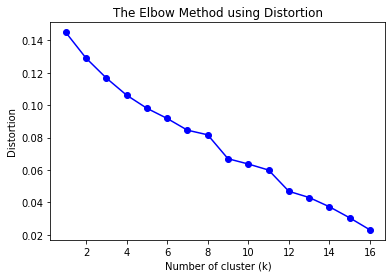

In [57]:
plt.plot(list_of_num_of_cluster, distortions, 'bo-') 
plt.xlabel('Number of cluster (k)') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

### Using the different values of Inertia

In [58]:
for key,val in mapping_inertia.items(): 
    print(str(key)+' : '+str(val))

1 : 0.4461153836040376
2 : 0.354060822904348
3 : 0.2989393936014212
4 : 0.257579585103184
5 : 0.23331067358281704
6 : 0.20337034635563456
7 : 0.18227948111871872
8 : 0.16238458872639194
9 : 0.140069169737178
10 : 0.11850490144917661
11 : 0.10546033572432512
12 : 0.08845990599885847
13 : 0.07220333894917662
14 : 0.0565061856862065
15 : 0.04323951901953983
16 : 0.032161741241762055


Plot the Elbow Method using Inertia

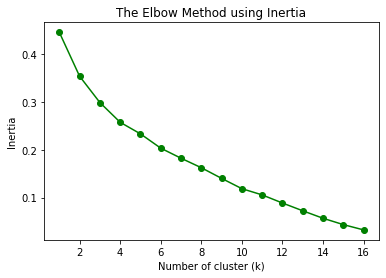

In [59]:
plt.plot(list_of_num_of_cluster, inertias, 'go-') 
plt.xlabel('Number of cluster (k)') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

**As you see above charts of the Elbow Method using the distortion or the inertia, we conclude that the optimal number of clusters for our data corpus is 8.**

## Clustering Neighborhoods of Paris, France

Run *k*-means to cluster the neighborhood into XXX clusters.

In [60]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 8

clustering_grouped_paris = df_grouped.drop(COL_NAME_NEIGHBOURHOOD, 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(clustering_grouped_paris)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 

array([2, 1, 2, 2, 6, 6, 4, 1, 6, 1, 6, 7, 3, 2, 1, 2, 1, 1, 0, 5],
      dtype=int32)

# Results <a name="results"></a>

## Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [61]:
COL_NAME_CLUSTER_LABELS = 'Cluster Labels'

# add clustering labels
neighborhoods_venues_sorted.insert(0, COL_NAME_CLUSTER_LABELS, kmeans.labels_)

df_merged_paris = df_merged

df_merged_paris = df_merged_paris.join(neighborhoods_venues_sorted.set_index(COL_NAME_NEIGHBOURHOOD), 
                                       on=COL_NAME_NEIGHBOURHOOD)

df_merged_paris.head() # check the last columns!

,postcode,neighbourhood,address,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,75001,"75002,75003,75004,75005,75006,75007,75008,75009","75001, FR",48.863554,2.338856,6,French Restaurant,Hotel,Café,Plaza,Japanese Restaurant,Bistro,Coffee Shop,Wine Bar,Bakery,Restaurant
1,75002,"75001,75003,75009,75010","75002, FR",48.867418,2.344256,2,French Restaurant,Bakery,Cocktail Bar,Wine Bar,Bistro,Italian Restaurant,Hotel,Thai Restaurant,Pastry Shop,Vietnamese Restaurant
2,75003,"75001,75002,75004,75010,75011","75003, FR",48.862607,2.360211,2,French Restaurant,Coffee Shop,Burger Joint,Café,Bistro,Boutique,Clothing Store,Bakery,Gourmet Shop,Pizza Place
3,75004,"75001,75003,75005,75006,75011,75012","75004, FR",48.856004,2.357028,2,French Restaurant,Pastry Shop,Hotel,Wine Bar,Gourmet Shop,Art Gallery,Clothing Store,Bakery,Ice Cream Shop,Tea Room
4,75005,"75001,75004,75006,75012,75013,75014","75005, FR",48.852752,2.346343,6,French Restaurant,Indie Movie Theater,Hotel,Café,Bookstore,Plaza,Bar,Bakery,Coffee Shop,Ice Cream Shop


## Let's visualize the resulting clusters

In [63]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Let's get the geographical coordinates of Paris, France
latitude, longitude = get_latitude_longitude_paris_fr()
print('The geograpical coordinate of Paris, FR are {}, {}.'.format(latitude, longitude))
# ------------------------------------------------------------------------------------------------

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, district, poi, cluster in zip(df_merged_paris[COL_NAME_LATITUDE], 
                                  df_merged_paris[COL_NAME_LONGITUDE],
                                  df_merged_paris[COL_NAME_POSTCODE],
                                  df_merged_paris[COL_NAME_NEIGHBOURHOOD], 
                                  df_merged_paris[COL_NAME_CLUSTER_LABELS]):
    label = 'District:{}, Neighbourhood:{}, Number of Cluster:{}'.format(district, poi, cluster+1)
    label = folium.Popup(label,
                         parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The geograpical coordinate of Paris, FR are 48.8566101, 2.3514992.


<img src="images/w5_h3.png">

<img src="images/w5_h4.png">

## Examining Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. 

Based on the defining categories, we can then assign a name to each cluster.

### Cluster 1

In [64]:
df_merged_paris.loc[df_merged_paris[COL_NAME_CLUSTER_LABELS] == 0, 
                    df_merged_paris.columns[[1] + list(range(5, df_merged_paris.shape[1]))]]

,neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,"75010,75011,75012,75019",0,Hotel,Supermarket,Tram Station,French Restaurant,Pizza Place,Brazilian Restaurant,Fast Food Restaurant,Stadium,Music Venue,Discount Store


### Cluster 2

In [65]:
df_merged_paris.loc[df_merged_paris[COL_NAME_CLUSTER_LABELS] == 1, 
                    df_merged_paris.columns[[1] + list(range(5, df_merged_paris.shape[1]))]]

,neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,"75001,75007,75009,75016,75017,75018",1,French Restaurant,Hotel,Bakery,Thai Restaurant,Theater,Art Gallery,Spa,Insurance Office,Creperie,Cocktail Bar
8,"75001,75002,75008,75010,75017,75018",1,French Restaurant,Hotel,Bakery,Cocktail Bar,Bistro,Italian Restaurant,Bar,Lounge,Japanese Restaurant,Café
9,"75002,75003,75009,75011,75018,75019,75020",1,French Restaurant,Hotel,Indian Restaurant,Restaurant,Japanese Restaurant,Coffee Shop,Bakery,African Restaurant,Gastropub,Sports Bar
14,"75006,75007,75014,75016",1,Hotel,French Restaurant,Pizza Place,Dessert Shop,Coffee Shop,Italian Restaurant,Japanese Restaurant,Seafood Restaurant,Bakery,Lebanese Restaurant
16,"75008,75009,75016,75018",1,Hotel,French Restaurant,Italian Restaurant,Bar,Bistro,Bakery,Sushi Restaurant,Yoga Studio,Café,Chinese Restaurant
17,"75008,75009,75010,75017,75019",1,French Restaurant,Bar,Hotel,Café,Pizza Place,Bistro,Italian Restaurant,Theater,Deli / Bodega,Wine Bar


### Cluster 3

In [66]:
df_merged_paris.loc[df_merged_paris[COL_NAME_CLUSTER_LABELS] == 2, 
                    df_merged_paris.columns[[1] + list(range(5, df_merged_paris.shape[1]))]]

,neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"75001,75003,75009,75010",2,French Restaurant,Bakery,Cocktail Bar,Wine Bar,Bistro,Italian Restaurant,Hotel,Thai Restaurant,Pastry Shop,Vietnamese Restaurant
2,"75001,75002,75004,75010,75011",2,French Restaurant,Coffee Shop,Burger Joint,Café,Bistro,Boutique,Clothing Store,Bakery,Gourmet Shop,Pizza Place
3,"75001,75003,75005,75006,75011,75012",2,French Restaurant,Pastry Shop,Hotel,Wine Bar,Gourmet Shop,Art Gallery,Clothing Store,Bakery,Ice Cream Shop,Tea Room
12,"75005,75012,75014",2,French Restaurant,Vietnamese Restaurant,Hotel,Bar,Bakery,Thai Restaurant,Bistro,Fast Food Restaurant,Café,Japanese Restaurant
15,"75007,75008,75015,75017",2,French Restaurant,Bakery,Italian Restaurant,Japanese Restaurant,Plaza,Coffee Shop,Bar,Train Station,Seafood Restaurant,Garden


### Cluster 4

In [67]:
df_merged_paris.loc[df_merged_paris[COL_NAME_CLUSTER_LABELS] == 3, 
                    df_merged_paris.columns[[1] + list(range(5, df_merged_paris.shape[1]))]]

,neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,"75005,75006,75013,75015",3,Café,Bakery,Supermarket,Hotel,Grocery Store,Plaza,French Restaurant,Flea Market,Farmers Market,Bistro


### Cluster 5

In [68]:
df_merged_paris.loc[df_merged_paris[COL_NAME_CLUSTER_LABELS] == 4, 
                    df_merged_paris.columns[[1] + list(range(5, df_merged_paris.shape[1]))]]

,neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,"75001,75006,75008,75015,75016",4,French Restaurant,Hotel,Café,Plaza,Italian Restaurant,History Museum,Garden,Art Museum,Historic Site,Basque Restaurant


### Cluster 6

In [69]:
df_merged_paris.loc[df_merged_paris[COL_NAME_CLUSTER_LABELS] == 5, 
                    df_merged_paris.columns[[1] + list(range(5, df_merged_paris.shape[1]))]]

,neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,"75010,75011,75018,75020",5,French Restaurant,Bar,Park,Café,Restaurant,Bistro,Diner,Moroccan Restaurant,Bus Stop,Metro Station


### Cluster 7

In [70]:
df_merged_paris.loc[df_merged_paris[COL_NAME_CLUSTER_LABELS] == 6, 
                    df_merged_paris.columns[[1] + list(range(5, df_merged_paris.shape[1]))]]

,neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"75002,75003,75004,75005,75006,75007,75008,75009",6,French Restaurant,Hotel,Café,Plaza,Japanese Restaurant,Bistro,Coffee Shop,Wine Bar,Bakery,Restaurant
4,"75001,75004,75006,75012,75013,75014",6,French Restaurant,Indie Movie Theater,Hotel,Café,Bookstore,Plaza,Bar,Bakery,Coffee Shop,Ice Cream Shop
5,"75001,75004,75005,75007,75014,75015",6,French Restaurant,Bookstore,Café,Creperie,Hotel,Bar,Seafood Restaurant,Plaza,Garden,Japanese Restaurant
10,"75003,75004,75010,75012,75019,75020",6,French Restaurant,Bar,Pizza Place,Italian Restaurant,Bistro,Coffee Shop,Hotel,Pub,Cocktail Bar,Vegetarian / Vegan Restaurant


### Cluster 8

In [71]:
df_merged_paris.loc[df_merged_paris[COL_NAME_CLUSTER_LABELS] == 7, 
                    df_merged_paris.columns[[1] + list(range(5, df_merged_paris.shape[1]))]]

,neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,"75004,75005,75011,75013,75020",7,French Restaurant,Hotel,Beer Bar,Coffee Shop,Restaurant,Music Venue,Museum,Skate Park,Brasserie,Steakhouse


# Discussion <a name="discussion"></a>

In above result, we have the clustering result of the various districts based on top 10 venues for each neighborhood.

As you see, the French Restaurant is the first most common venue in most of districts in Paris. 

When reviewing the clusters, we could see that the **Vietnamese restaurant** in cluster 3. **Indeed, as you see, Vietnamese Restaurant is the second and the 10th most common venus in District 13 and District 2, respectively.** Thus, the districts, which are clustered in **cluster 3**, are good location candidates. 

In summary, our proposed districts could be considered as one of the interesting starting points. In order to analyze more in detail, we need to review the other relevantly important factors and conditions.

# Conclusion and Perspective <a name="conclusion"></a>

## Conclusion

In conclusion, depending on the several requirements of the investors, if they would like to open new Vietnamese restaurant in the district that have already had many Vietnamese restaurants, they should open in **District 13**. 

In addition, they can open new one in **District 2**, because this district is also good community for opening Vietnamese restaurant. 

Moreover, if the investors would like to open new one in the districts that are *similar to District 13 and District 2*, they could locate it in the districts that are clustered in **Cluster 3** such as **District 3, 4, 16 in Paris**.


## Perspectives

Concerning to enhance the features of district, we should add more relevant features for each district such as: 

+ the transport info (public transport, parking, etc.), 
+ the information of asian communities, 
+ the information of major tourist venues
+ etc.

Concerning to clustering methods and enhancing the performances, we could do some experiments with other algorithms, for instance, 

+ Fuzzy c-means method
+ DBSCAN: Density-based clustering
+ Hierarchical K-Means Clustering
+ HCPC: Hierarchical clustering on principal components
+ Deep Learning Models. To see more detail, please see in "A Survey of Clustering With Deep Learning: Fromthe Perspective of Network Architecture" (2018) - https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8412085

# References <a name="references"></a>

[1] "INSEE official estimated population by department and region as of 1 January 2019". 22 January 2019. Archived from the original on 21 April 2017. Retrieved 4 April 2017.

[2] Île-de-France, https://en.wikipedia.org/wiki/%C3%8Ele-de-France

[3] Economist Intelligence Unit Worldwide Cost of Living Survey, 2018, cited in the London Telegraph, 16 March 2018 Archived 30 March 2019 at the Wayback Machine

[4] Singapour, Hong Kong, Paris : le trio des villes les plus chères du monde Archived 27 March 2019 at the Wayback Machine, International mail.com. 20 March 2019.

[5] Paris, https://en.wikipedia.org/wiki/Paris

[6] "Ile-de-France- Portrait of the Region- Key figures (in French)". Regional Council of the Ile-de-France. Retrieved 24 November 2018.

[7] 10 Top Vietnamese Restaurants in Paris, https://www.travelmag.com/articles/vietnamese-restaurants-paris/

[8] The tutorials in course "Applied Data Science Capstone", https://www.coursera.org/learn/applied-data-science-capstone/

[9] Housing Sales Prices & Venues Data Analysis of Istanbul, https://www.linkedin.com/pulse/housing-sales-prices-venues-data-analysis-ofistanbul-sercan-y%C4%B1ld%C4%B1z/

[10] Paris Arrondissements & Neighborhoods Map, https://parismap360.com/paris-arrondissement-map#.XfVpqtEo91l
    
[11] Arrondissements in Paris, France, https://francetravelplanner.com/go/paris/areas/arrondismt.html

[12] Elbow Method for optimal value of k in KMeans, https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/